<a href="https://colab.research.google.com/github/sunshineluyao/CV_XAI/blob/master/DataProcessing/Data_Processing_2022_05_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations

In [217]:
# install packages
import pandas as pd
import numpy as np


In [218]:
# connect google drive 
from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Authenticated


In [219]:
# define the project folder in your google drive to save output figures and data
# please first a project folder named "CV_XAI" in the root directory on your google drive

In [220]:
pwd

'/content/drive/My Drive/67Crypto'

In [221]:
cd /content/drive/MyDrive/CV_XAI

/content/drive/MyDrive/CV_XAI


# Step 1; Import data and data processing

## import the off-chain transaction volume data 

In [ ]:

#be sure to provide the raw link
df_Volume=pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/CV_XAI/master/Data/CMC.csv")
df_Volume.head()

,Date,Volume
0,5/31/22,"$33,538,210,634"
1,5/30/22,"$39,277,993,274"
2,5/29/22,"$18,093,886,409"
3,5/28/22,"$19,252,320,708"
4,5/27/22,"$36,582,005,748"


In [ ]:
# make sure that the data variable is in the correct data type
df_Volume['Date']=pd.to_datetime(df_Volume['Date'])
df_Volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3320 non-null   datetime64[ns]
 1   Volume  3319 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 52.0+ KB


In [ ]:
# get the latest timestamp
pd.Timestamp(df_Volume['Date'][0])

Timestamp('2022-05-31 00:00:00')

In [ ]:
# only keep the dates
df_Volume['Date']=df_Volume['Date'].dt.strftime('%Y-%m-%d')
df_Volume.head()

,Date,Volume
0,2022-05-31,"$33,538,210,634"
1,2022-05-30,"$39,277,993,274"
2,2022-05-29,"$18,093,886,409"
3,2022-05-28,"$19,252,320,708"
4,2022-05-27,"$36,582,005,748"


In [ ]:
# set the date column as the index
df_Volume.set_index('Date',drop=True,inplace=True)

In [ ]:
df_Volume.head()

,Volume
Date,
2022-05-31,"$33,538,210,634"
2022-05-30,"$39,277,993,274"
2022-05-29,"$18,093,886,409"
2022-05-28,"$19,252,320,708"
2022-05-27,"$36,582,005,748"


In [ ]:
# polish the column headers
df_Volume.index.name=None
df_Volume.head()

,Volume
2022-05-31,"$33,538,210,634"
2022-05-30,"$39,277,993,274"
2022-05-29,"$18,093,886,409"
2022-05-28,"$19,252,320,708"
2022-05-27,"$36,582,005,748"


In [ ]:
# clear the volume column
df_Volume['Volume']=df_Volume['Volume'].str.replace(',', '')
df_Volume['Volume']=df_Volume['Volume'].str.replace('$', '')
df_Volume.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Volume
2022-05-31,33538210634
2022-05-30,39277993274
2022-05-29,18093886409
2022-05-28,19252320708
2022-05-27,36582005748


In [ ]:
# make sure that the data type of the volume column is in the correct data type
df_Volume['Volume']=pd.to_numeric(df_Volume['Volume'])

In [ ]:
df_Volume = df_Volume[['Volume']]

In [ ]:
# reverse the order of the dataframe: https://www.marsja.se/six-ways-to-reverse-pandas-dataframe/
df_Volume = df_Volume.sort_index(ascending=True)
df_Volume.tail()

,Volume
2022-05-27,3.658201e+10
2022-05-28,1.925232e+10
2022-05-29,1.809389e+10
2022-05-30,3.927799e+10
2022-05-31,3.353821e+10


## import the coinmetrics data 

In [ ]:
df_CM=pd.read_csv("https://raw.githubusercontent.com/coinmetrics-io/data/master/csv/btc.csv")
df_CM.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# set "date" column as the index
df_CM.set_index('time', inplace=True)


In [ ]:
# keep the intended data range
df_CM.index.name=None
df_CM=df_CM[df_CM.index<'2022-06-01']
df_CM.tail()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
2022-05-27,942679.0,9325.0,2398784.0,17339823.0,969.0,481619.0,7463892.0,44.0,98091.0,42035363.0,...,849059.0,569197.759869,1.628591e+10,1.442543,41274.105371,0.003002,85.899643,19.221264,0.033787,0.038853
2022-05-28,783393.0,9318.0,2400024.0,17351780.0,968.0,481793.0,7469163.0,44.0,98208.0,42070677.0,...,694351.0,200984.866330,5.837710e+09,0.742049,21553.205249,0.002500,72.613802,19.143742,0.033797,0.038889
2022-05-29,751185.0,9318.0,2401520.0,17348337.0,970.0,482067.0,7470177.0,44.0,98199.0,42080760.0,...,628221.0,169754.492881,4.995886e+09,0.558307,16431.017321,0.002397,70.540344,19.088569,0.033811,0.038956
2022-05-30,925404.0,9302.0,2401735.0,17310777.0,971.0,481893.0,7468999.0,45.0,98215.0,42039663.0,...,761355.0,224851.357509,7.135873e+09,0.769859,24432.219968,0.002967,94.168512,19.086847,0.034320,0.041777
2022-05-31,998795.0,9305.0,2402617.0,17302964.0,970.0,482075.0,7477559.0,45.0,98104.0,42016682.0,...,822314.0,617202.924316,1.964644e+10,1.567716,49902.604524,0.003100,98.692967,19.127691,0.034318,0.041539


## import the UTXO Distribution Data

In [ ]:
df_UTXO=pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/CV_XAI/master/Data/UTXO_2022_5_31.csv")
df_UTXO.head()

,date,-9,-7,-5,-3,-1,1,3,5,7,9,11
0,1/3/09,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/4/09,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/5/09,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/6/09,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/7/09,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Change the header to be labels
df_UTXO.columns = ['date','<1d','1d ~ 1m','1m ~ 1q','1q ~ 6m','6m ~ 1y','1y ~ 2y', '2y ~ 3y','3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']

In [ ]:
#set "date" column as the index
df_UTXO.set_index('date', inplace=True)
#to remove the name of the index
df_UTXO.index.name=None
df_UTXO.tail()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y
5/27/22,395672.9788,1452448.221,1419273.974,1287130.293,2007781.033,3996852.753,1275723.997,1336549.673,1468311.166,1967048.139,2444385.067
5/28/22,128636.0455,1705217.896,1429486.337,1288996.452,2006910.189,3999898.416,1267892.973,1332747.962,1478870.777,1967914.509,2445530.741
5/29/22,171061.0156,1638843.072,1452073.747,1286338.872,1987598.670,4024809.817,1265335.086,1333202.411,1477725.495,1970411.151,2445634.208
5/30/22,205910.0241,1606553.295,1201489.502,1528916.189,1989678.460,4029576.555,1263858.070,1334221.765,1477684.074,1970127.455,2445980.657
5/31/22,389976.0264,1467225.643,1177501.097,1492866.291,2003999.286,4031965.403,1263796.106,1333408.318,1478471.225,1969393.395,2446305.754


# Step 2: merge the CoinmarketCap and Coinmetrics data frame

In [ ]:
df_btc = pd.merge(df_CM, df_Volume, how='outer', left_index=True, right_index=True)
df_btc.tail()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Volume
2022-05-27,942679.0,9325.0,2398784.0,17339823.0,969.0,481619.0,7463892.0,44.0,98091.0,42035363.0,...,569197.759869,1.628591e+10,1.442543,41274.105371,0.003002,85.899643,19.221264,0.033787,0.038853,3.658201e+10
2022-05-28,783393.0,9318.0,2400024.0,17351780.0,968.0,481793.0,7469163.0,44.0,98208.0,42070677.0,...,200984.866330,5.837710e+09,0.742049,21553.205249,0.002500,72.613802,19.143742,0.033797,0.038889,1.925232e+10
2022-05-29,751185.0,9318.0,2401520.0,17348337.0,970.0,482067.0,7470177.0,44.0,98199.0,42080760.0,...,169754.492881,4.995886e+09,0.558307,16431.017321,0.002397,70.540344,19.088569,0.033811,0.038956,1.809389e+10
2022-05-30,925404.0,9302.0,2401735.0,17310777.0,971.0,481893.0,7468999.0,45.0,98215.0,42039663.0,...,224851.357509,7.135873e+09,0.769859,24432.219968,0.002967,94.168512,19.086847,0.034320,0.041777,3.927799e+10
2022-05-31,998795.0,9305.0,2402617.0,17302964.0,970.0,482075.0,7477559.0,45.0,98104.0,42016682.0,...,617202.924316,1.964644e+10,1.567716,49902.604524,0.003100,98.692967,19.127691,0.034318,0.041539,3.353821e+10


In [ ]:
df_btc.tail()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Volume
2022-05-27,942679.0,9325.0,2398784.0,17339823.0,969.0,481619.0,7463892.0,44.0,98091.0,42035363.0,...,569197.759869,1.628591e+10,1.442543,41274.105371,0.003002,85.899643,19.221264,0.033787,0.038853,3.658201e+10
2022-05-28,783393.0,9318.0,2400024.0,17351780.0,968.0,481793.0,7469163.0,44.0,98208.0,42070677.0,...,200984.866330,5.837710e+09,0.742049,21553.205249,0.002500,72.613802,19.143742,0.033797,0.038889,1.925232e+10
2022-05-29,751185.0,9318.0,2401520.0,17348337.0,970.0,482067.0,7470177.0,44.0,98199.0,42080760.0,...,169754.492881,4.995886e+09,0.558307,16431.017321,0.002397,70.540344,19.088569,0.033811,0.038956,1.809389e+10
2022-05-30,925404.0,9302.0,2401735.0,17310777.0,971.0,481893.0,7468999.0,45.0,98215.0,42039663.0,...,224851.357509,7.135873e+09,0.769859,24432.219968,0.002967,94.168512,19.086847,0.034320,0.041777,3.927799e+10
2022-05-31,998795.0,9305.0,2402617.0,17302964.0,970.0,482075.0,7477559.0,45.0,98104.0,42016682.0,...,617202.924316,1.964644e+10,1.567716,49902.604524,0.003100,98.692967,19.127691,0.034318,0.041539,3.353821e+10


# step 3: visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [ ]:
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn-bright')

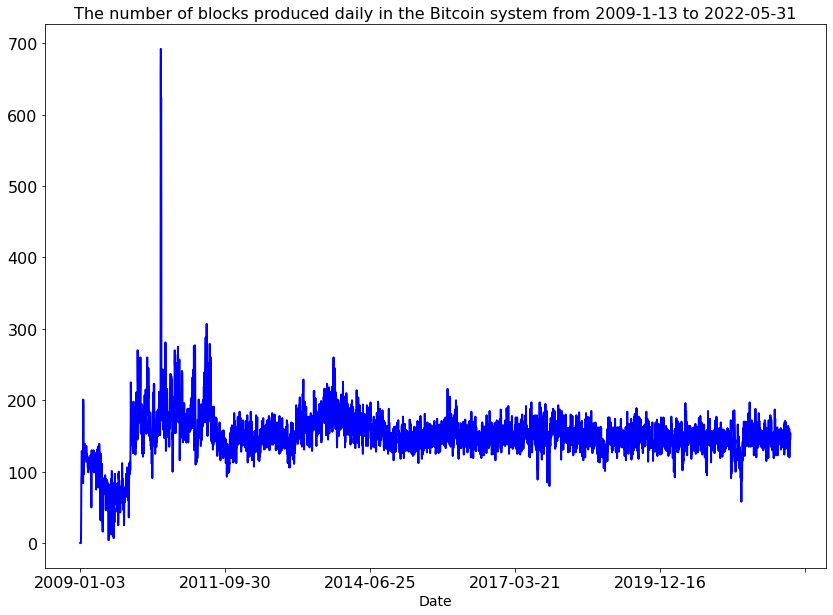

In [ ]:
# Plot The number of block produced daily in the Bitcoin system.
ax = df_btc['BlkCnt'].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=14)

# Specify the title in your plot
ax.set_title('The number of blocks produced daily in the Bitcoin system from 2009-1-13 to 2022-05-31', fontsize=16)


# Show plot
plt.savefig('BlkCnt.png')

In [ ]:
print(df_btc['BlkCnt'].mean())

150.87137607186608


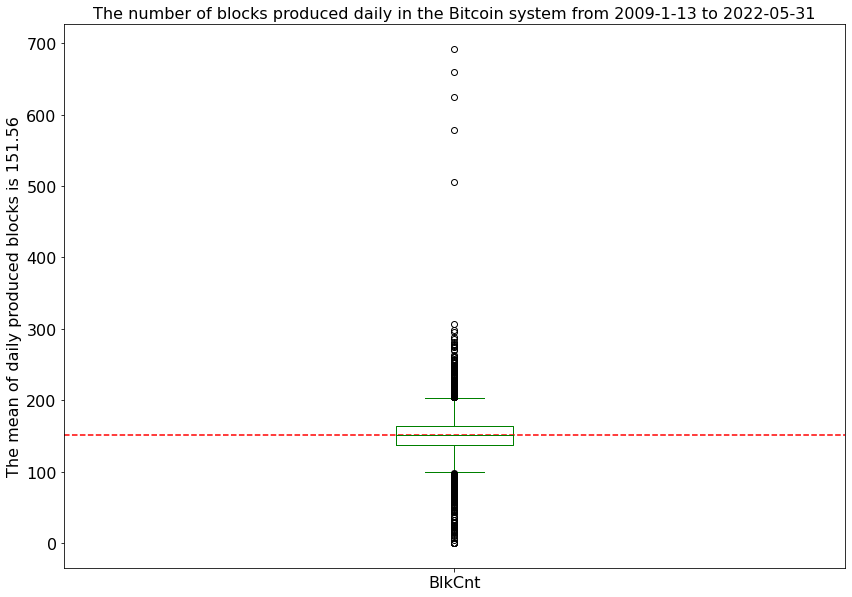

In [ ]:
# Plot The Boxplot for number of block produced daily in the Bitcoin system.
# Check the types of plot: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
ax = df_btc['BlkCnt'].plot(kind='box', color='green', figsize=(14, 10), fontsize=16)


# Specify the title in your plot
ax.set_title('The number of blocks produced daily in the Bitcoin system from 2009-1-13 to 2022-05-31', fontsize=16)
ax.set_ylabel('The mean of daily produced blocks is 151.56', fontsize=16)


# Add a red horizontal line for the mean
ax.axhline(151.5588436148418, color='red', linestyle='--')
# Show plot
plt.savefig('btc_blockdaily_boxplot.png')

In [ ]:
# clear the plot
plt.show()

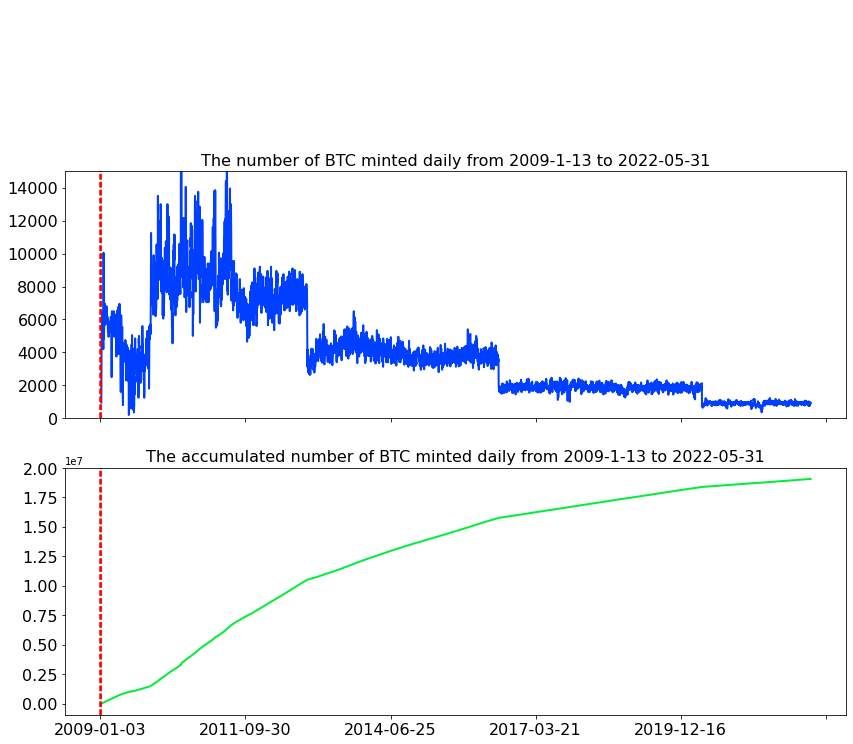

In [ ]:
#### Plot The number and accumulated number of BTC minted daily in scatter plot and the total BTC minted in line plot
###Check all color maps here https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
ax = df_btc[['IssTotNtv','SplyCur']].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The number of BTC minted daily from 2009-1-13 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The accumulated number of BTC minted daily from 2009-1-13 to 2022-05-31',fontsize=16)
ax[0][0].set_ylim([0,15000])
# Add a red vertical line for the first halving date
ax[0][0].axvline('2012-11-28', color='red', linestyle='--')
ax[1][0].axvline('2012-11-28', color='red', linestyle='--')
ax[0][0].annotate('the first halving date 2012-11-28',
            xy=('2012-12-28', 25000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
# Add a red vertical line for the second halving date
ax[0][0].axvline('2016-07-09', color='red', linestyle='--')
ax[1][0].axvline('2016-07-09', color='red', linestyle='--')
ax[0][0].annotate('the second halving date 2016-07-09',
            xy=('2016-08-09', 20000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
# Add a red vertical line for the third halving date
ax[0][0].axvline('2020-05-11', color='red', linestyle='--')
ax[1][0].axvline('2020-05-11', color='red', linestyle='--')
ax[0][0].annotate('the third halving date 2020-05-11',
            xy=('2020-06-11', 20000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.savefig('btc_halving.png')


In [ ]:
# Calculate the annualized Bitcoin dilution rate 
# More about Rolling average here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
# annualized dilution rate in percentage=100*365*the moving average of the number of generated btc in the past 30 days/total generated btc
df_btc['Annualized_DilutionRate']=100*365*df_btc['IssTotNtv'].rolling(window=30).mean()/df_btc['SplyCur']

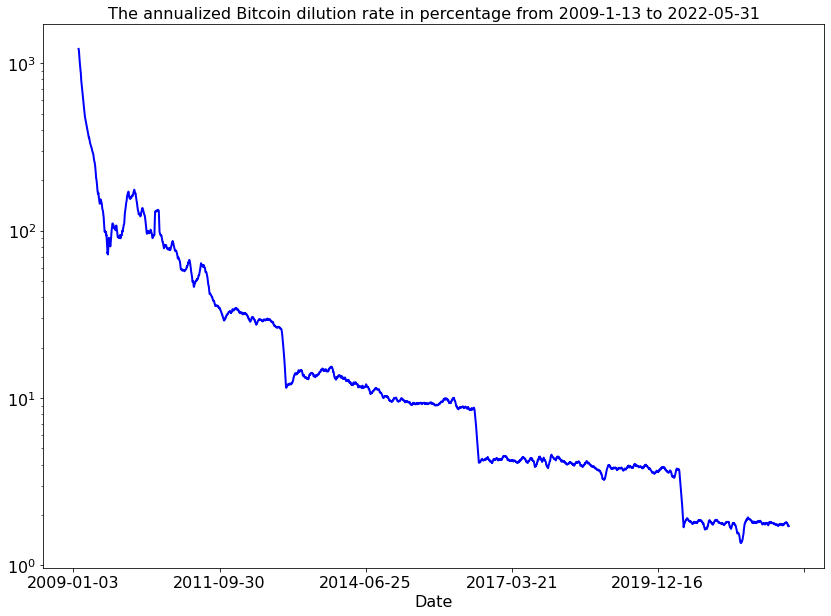

In [ ]:
# Plot The annualized Bitcoin dilution rate in percentage.
ax = df_btc['Annualized_DilutionRate'].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The annualized Bitcoin dilution rate in percentage from 2009-1-13 to 2022-05-31', fontsize=16)
ax.set_yscale('log')

# Show plot
plt.savefig('btc_dilution.png')

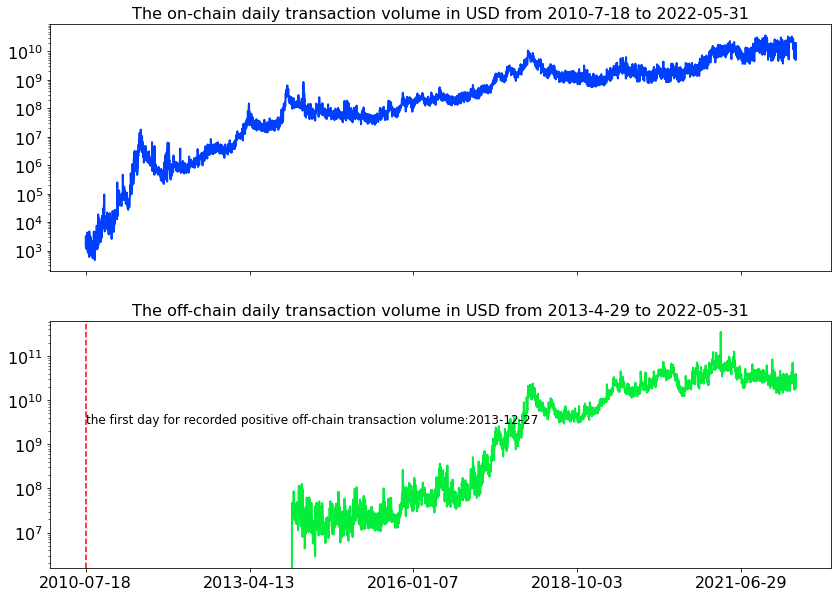

In [ ]:
# Plot the on-chain transaction volume and off-chain transaction volume
ax = df_btc[['TxTfrValAdjUSD','Volume']]['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The on-chain daily transaction volume in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The off-chain daily transaction volume in USD from 2013-4-29 to 2022-05-31',fontsize=16)
ax[1][0].axvline('2013-12-27', color='red', linestyle='--')
ax[1][0].annotate('the first day for recorded positive off-chain transaction volume:2013-12-27',
            xy=('2010-08-18', 5000000000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('btc_volume_two.png')

In [ ]:
# calculate the total transaction volume
# calculate daily Revenue 
df_btc['Total daily transaction volume']=df_btc['TxTfrValAdjUSD']+df_btc['Volume']
df_btc['Total daily transaction volume']['2010-07-18':'2013-4-28']=df_btc['TxTfrValAdjUSD']['2010-07-18':'2013-4-28']
df_btc[['Total daily transaction volume','TxTfrValAdjUSD','Volume']]['2010-07-18':'2013-4-28']

,Total daily transaction volume,TxTfrValAdjUSD,Volume
2010-07-18,1.474778e+03,1.474778e+03,NaN
2010-07-19,3.251693e+03,3.251693e+03,NaN
2010-07-20,1.200497e+03,1.200497e+03,NaN
2010-07-21,1.649916e+03,1.649916e+03,NaN
2010-07-22,1.932369e+03,1.932369e+03,NaN
...,...,...,...
2013-12-27,1.317836e+08,1.317836e+08,46862700.0
2013-12-28,9.683395e+07,9.683395e+07,32505800.0
2013-12-29,9.695811e+07,9.695811e+07,19011300.0
2013-12-30,1.500770e+08,1.500770e+08,20707700.0


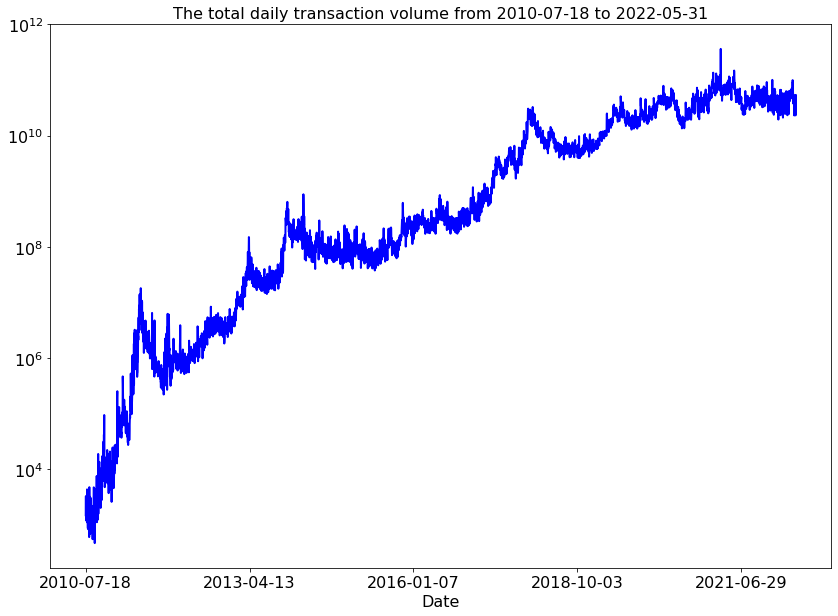

In [ ]:
# Plot total daily transaction volume
ax = df_btc['Total daily transaction volume']['2010-07-18':].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The total daily transaction volume from 2010-07-18 to 2022-05-31', fontsize=16)

# Show plot
ax.set_yscale('log')
plt.savefig('btc_volume_total.png')

In [ ]:
# Calculate the velocity
# More about Rolling average here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
# The velocity in percentage=100*the moving average of the volumn in the past 90 days/total market cap
df_btc['Velocity']=100*df_btc['Total daily transaction volume'].rolling(window=90).mean()/df_btc['CapMrktCurUSD']

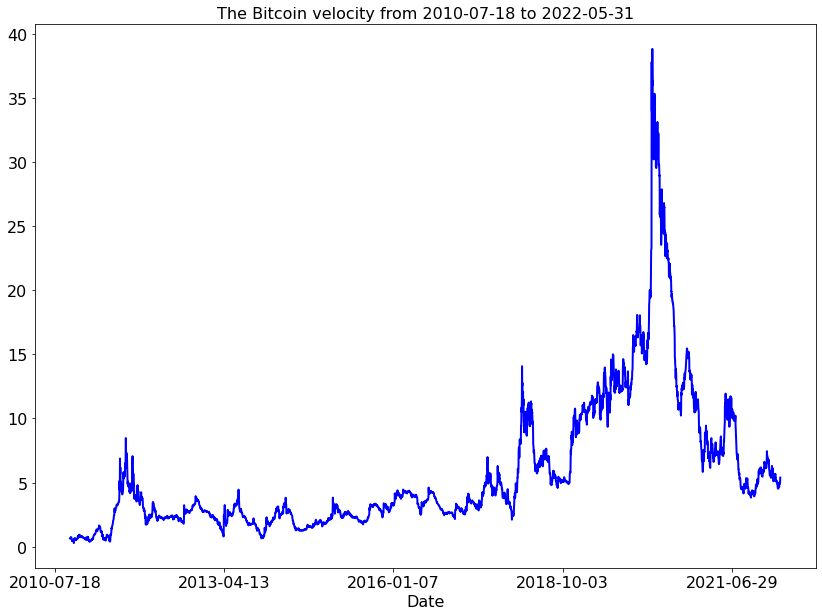

In [ ]:
# Plot The Bitcoin velocity in percentage
ax = df_btc['Velocity']['2010-07-18':].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The Bitcoin velocity from 2010-07-18 to 2022-05-31', fontsize=16)

# Show plot
plt.savefig('btc_velocity.png')

In [ ]:
####Exploring the age of bitcoin
df_UTXO.info()
###the column marked with y are accumulated values and the column marked with text are interval values

<class 'pandas.core.frame.DataFrame'>
Index: 4897 entries, 1/3/09 to 5/31/22
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   <1d      4897 non-null   float64
 1   1d ~ 1m  4897 non-null   float64
 2   1m ~ 1q  4897 non-null   float64
 3   1q ~ 6m  4897 non-null   float64
 4   6m ~ 1y  4897 non-null   float64
 5   1y ~ 2y  4897 non-null   float64
 6   2y ~ 3y  4897 non-null   float64
 7   3y ~ 4y  4897 non-null   float64
 8   4y ~ 5y  4897 non-null   float64
 9    5y~10y  4897 non-null   float64
 10  >10y     4897 non-null   float64
dtypes: float64(11)
memory usage: 459.1+ KB


In [ ]:
# check the columns headers
df_UTXO.columns

Index(['<1d', '1d ~ 1m', '1m ~ 1q', '1q ~ 6m', '6m ~ 1y', '1y ~ 2y', '2y ~ 3y',
       '3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y'],
      dtype='object')

In [ ]:
# generate the percentage
df_UTXO = df_UTXO.apply(lambda x: x/x.sum(), axis=1)
df_UTXO.head()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y
1/3/09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/4/09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/5/09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/6/09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/7/09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## make sure the date index is in the correct data type
df_UTXO.index =pd.to_datetime(df_UTXO.index)

<Figure size 1008x720 with 0 Axes>

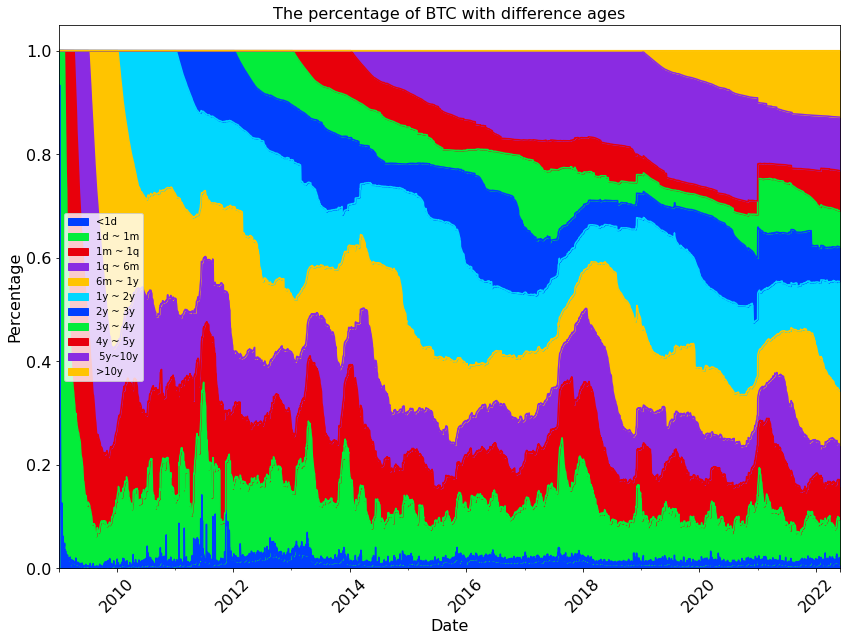

In [ ]:
# staking ratio visualization
plt.figure(figsize=(14, 10))
df_UTXO.plot.area(figsize=(14,10), fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.title('The percentage of BTC with difference ages',fontsize=16)
plt.xticks(rotation=45)
plt.savefig('btc_StakedAge.png')

In [ ]:
# Calculate Staking Ratio in different years
df_UTXO['One-year staking ratio']=df_UTXO[['1y ~ 2y', '2y ~ 3y','3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Two-year staking ratio']=df_UTXO[['2y ~ 3y','3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Three-year staking ratio']=df_UTXO[['3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Four-year staking ratio']=df_UTXO[['4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Five-year staking ratio']=df_UTXO[[' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Ten-year staking ratio']=df_UTXO[[ '>10y']].sum(axis=1)
df_UTXO.tail()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio
2022-05-27,0.020769,0.076239,0.074498,0.067562,0.105389,0.209796,0.066963,0.070156,0.077072,0.103251,0.128306,0.655543,0.445748,0.378785,0.308629,0.231557,0.128306
2022-05-28,0.006752,0.089503,0.075030,0.067656,0.105338,0.209945,0.066549,0.069953,0.077622,0.103291,0.128360,0.655721,0.445775,0.379227,0.309274,0.231651,0.128360
2022-05-29,0.008978,0.086015,0.076212,0.067514,0.104319,0.211242,0.066411,0.069973,0.077559,0.103417,0.128359,0.656962,0.445719,0.379308,0.309335,0.231776,0.128359
2022-05-30,0.010807,0.084316,0.063057,0.080241,0.104423,0.211482,0.066330,0.070023,0.077552,0.103397,0.128371,0.657156,0.445674,0.379344,0.309321,0.231768,0.128371
2022-05-31,0.020466,0.077000,0.061795,0.078345,0.105170,0.211597,0.066324,0.069977,0.077590,0.103354,0.128382,0.657224,0.445627,0.379303,0.309326,0.231736,0.128382


<Figure size 1008x720 with 0 Axes>

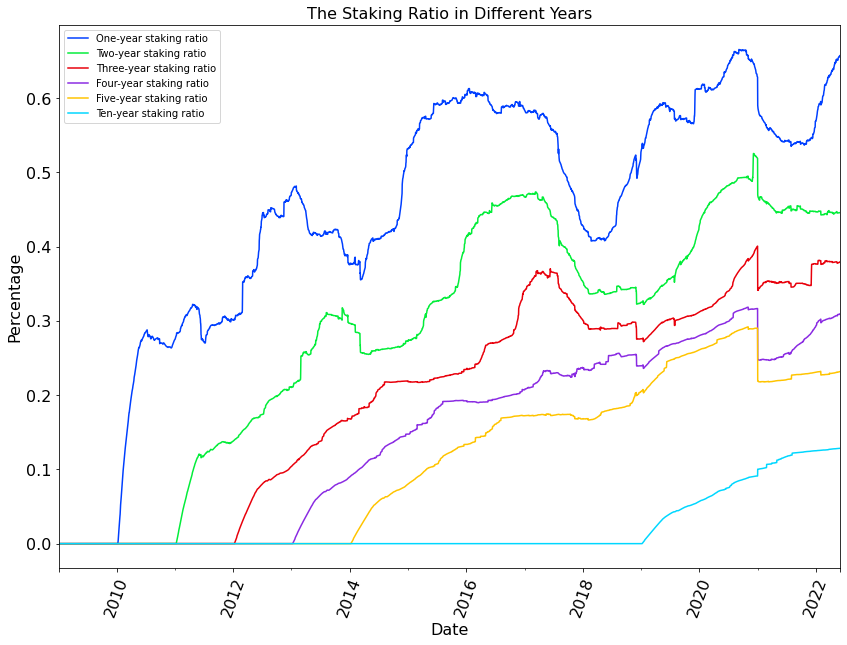

In [ ]:
plt.figure(figsize=(14, 10))
df_UTXO[['One-year staking ratio','Two-year staking ratio','Three-year staking ratio','Four-year staking ratio','Five-year staking ratio','Ten-year staking ratio']].plot(figsize=(14,10), fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.title('The Staking Ratio in Different Years',fontsize=16)
plt.xticks(rotation=70)
plt.savefig('btc_SR.png')

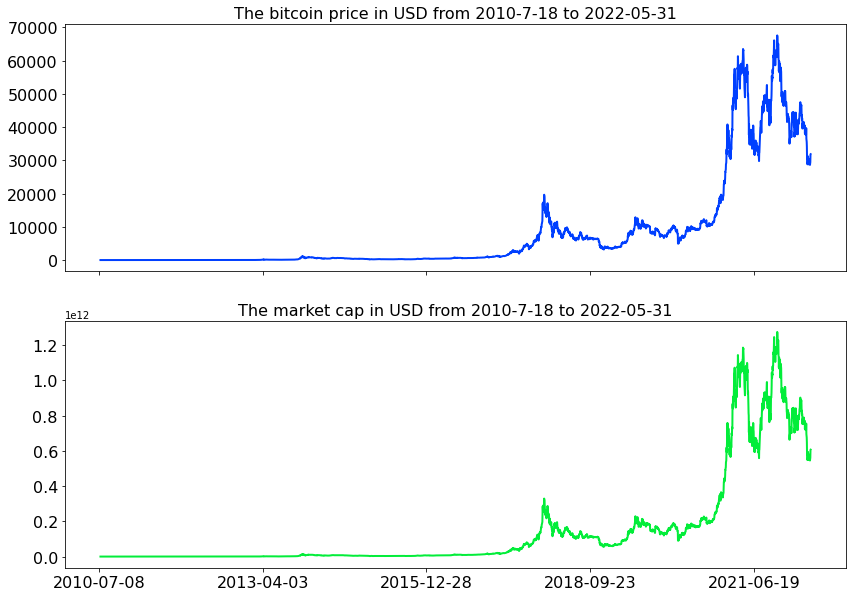

In [ ]:
#### Plot bitcoin price and the market cap
ax = df_btc[['PriceUSD','CapMrktCurUSD']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The bitcoin price in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The market cap in USD from 2010-7-18 to 2022-05-31',fontsize=16)
plt.savefig('btc_P_M.png')

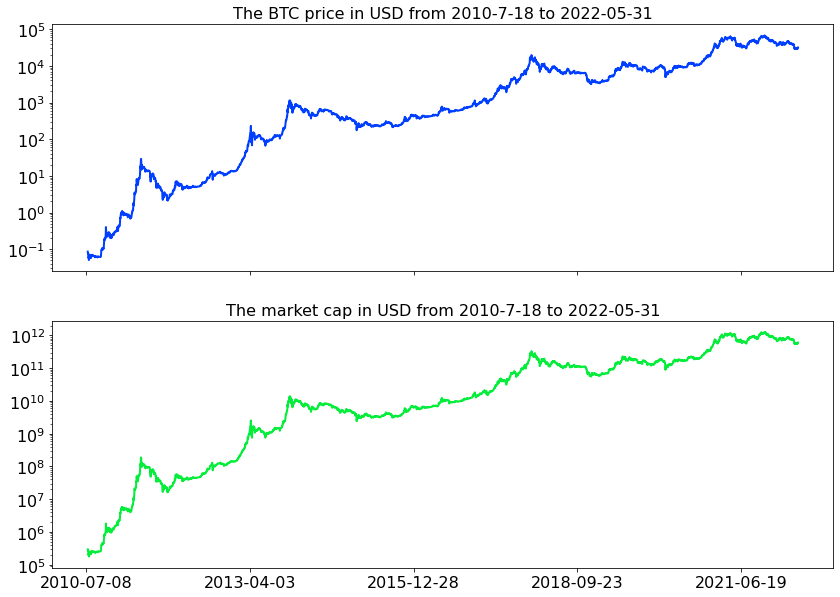

In [ ]:
#### Plot bitcoin price and the market cap
ax = df_btc[['PriceUSD','CapMrktCurUSD']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The market cap in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('btc_P_M_log.png')

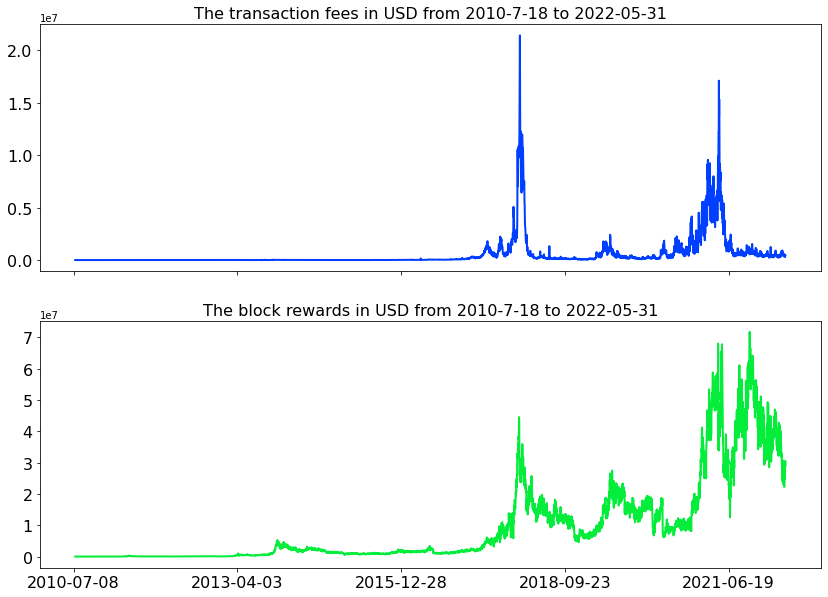

In [ ]:
#####plot Miners' revenue in USD: transaction fees and block rewards
ax = df_btc[['FeeTotUSD','IssTotUSD']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The transaction fees in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The block rewards in USD from 2010-7-18 to 2022-05-31',fontsize=16)
plt.savefig('btc_Revenue.png')

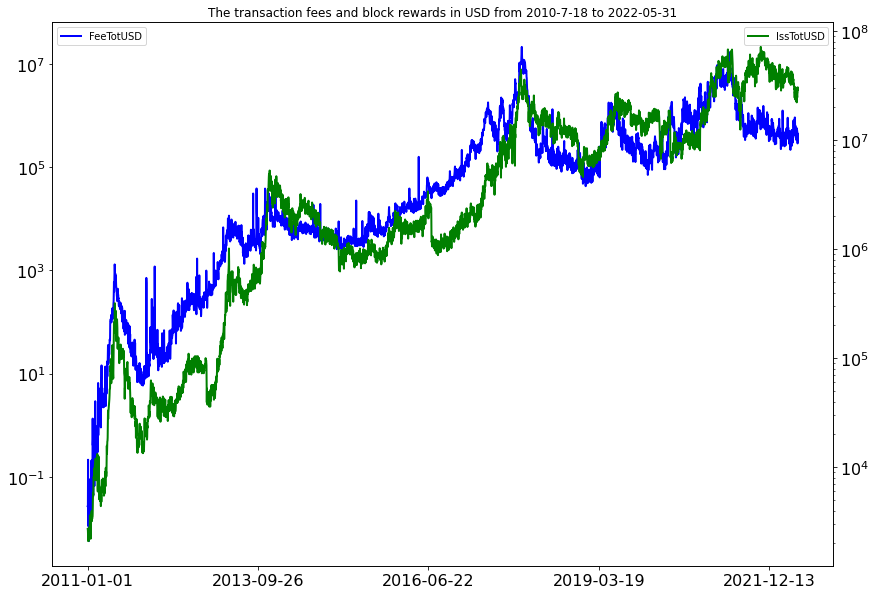

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df_btc['FeeTotUSD']['2010-7-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df_btc['IssTotUSD']['2010-7-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The transaction fees and block rewards in USD from 2010-7-18 to 2022-05-31')
plt.legend(loc='best')
plt.savefig('btc_tb.png')

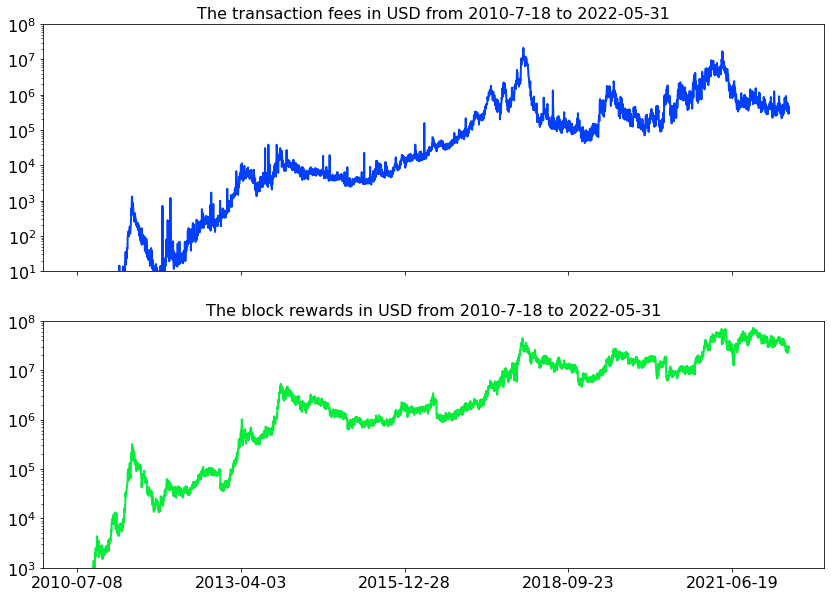

In [ ]:
#####plot Miners' revenue in USD: transaction fees and block rewards
ax = df_btc[['FeeTotUSD','IssTotUSD']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The transaction fees in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The block rewards in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
ax[0][0].set_ylim([10,100000000])
ax[1][0].set_ylim([1000,100000000])
plt.savefig('btc_Revenue_log.png')

In [ ]:
####calculate daily Revenue 
df_btc['The daily revenue of bitcoin miners']=df_btc['IssTotUSD']+df_btc['FeeTotUSD']
###calcualte the accumulated revenue 
df_btc['The accumulated revenue of bitcoin miners']=df_btc['The daily revenue of bitcoin miners'].cumsum()

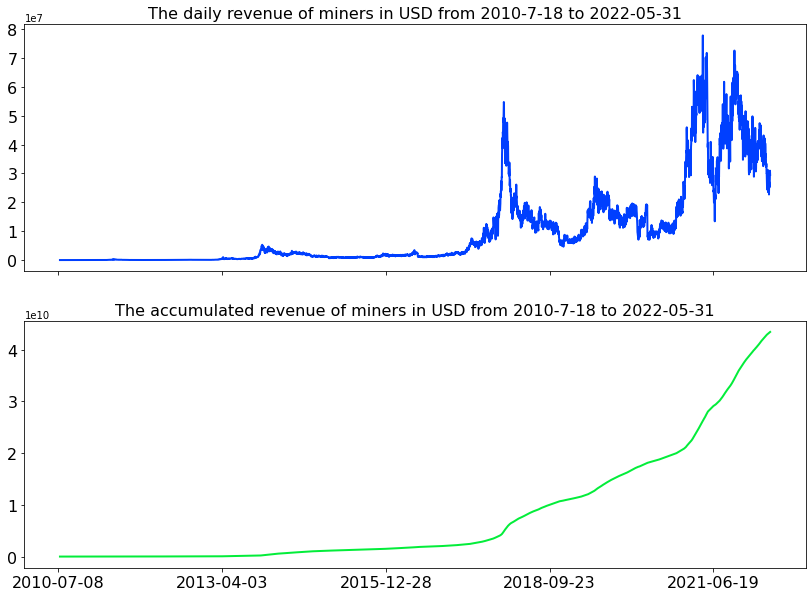

In [ ]:
#####plot the daily revenue and the accumulated revenue of bitcoin miners
ax = df_btc[['The daily revenue of bitcoin miners','The accumulated revenue of bitcoin miners']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2010-7-18 to 2022-05-31',fontsize=16)
plt.savefig('btc_Revenue_merged.png')

In [ ]:
####calculate daily Revenue 
df_btc['The daily revenue of bitcoin miners']=df_btc['IssTotUSD']+df_btc['FeeTotUSD']
###calcualte the accumulated revenue 
df_btc['The accumulated revenue of bitcoin miners']=df_btc['The daily revenue of bitcoin miners'].cumsum()

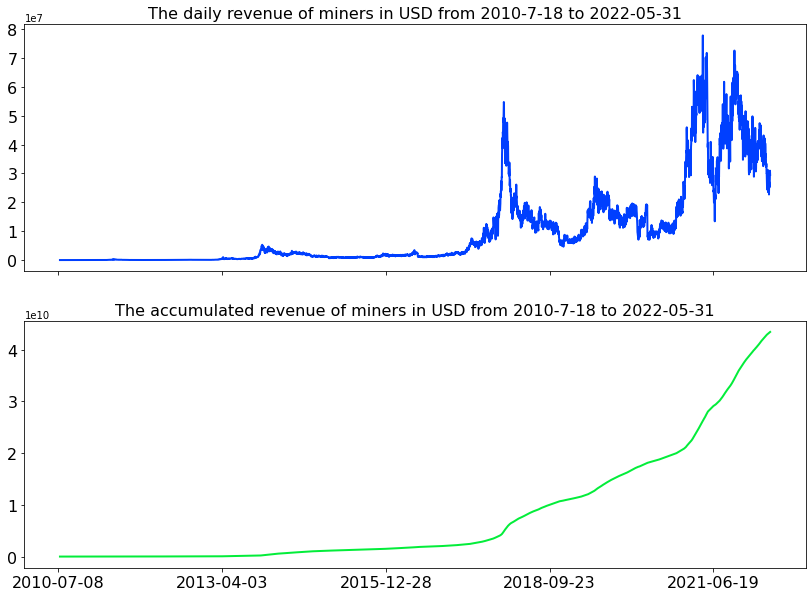

In [ ]:
#####plot the daily revenue and the accumulated revenue of bitcoin miners
ax = df_btc[['The daily revenue of bitcoin miners','The accumulated revenue of bitcoin miners']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2010-7-18 to 2022-05-31',fontsize=16)
plt.savefig('btc_Revenue_merged.png')

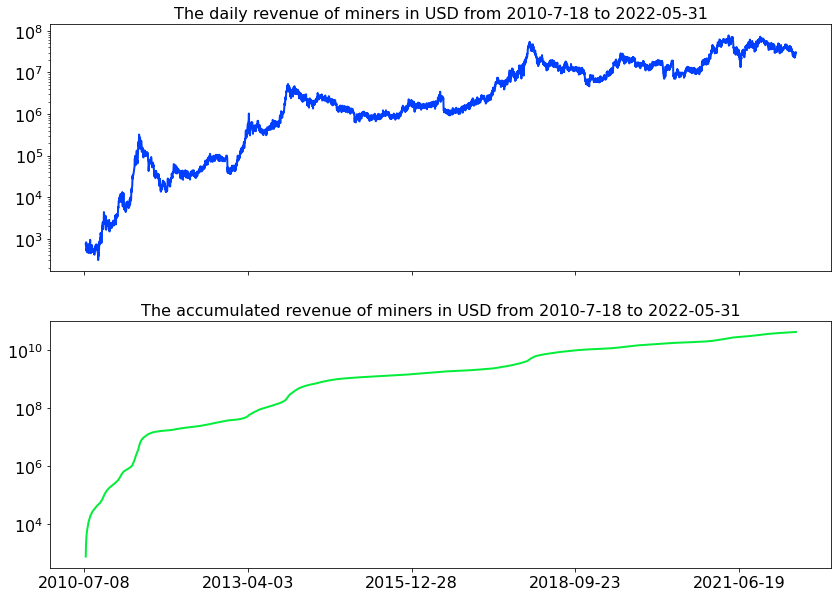

In [ ]:
#####plot the daily revenue and the accumulated revenue of bitcoin miners
ax = df_btc[['The daily revenue of bitcoin miners','The accumulated revenue of bitcoin miners']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('btc_Revenue_merged_log.png')

In [ ]:
###calculate P/E Ratio=MarketCap/365*the moving average of miner's revenue in the past 365 days
df_btc['P/E Ratio']=df_btc['CapMrktCurUSD']/(365*df_btc['The daily revenue of bitcoin miners'])

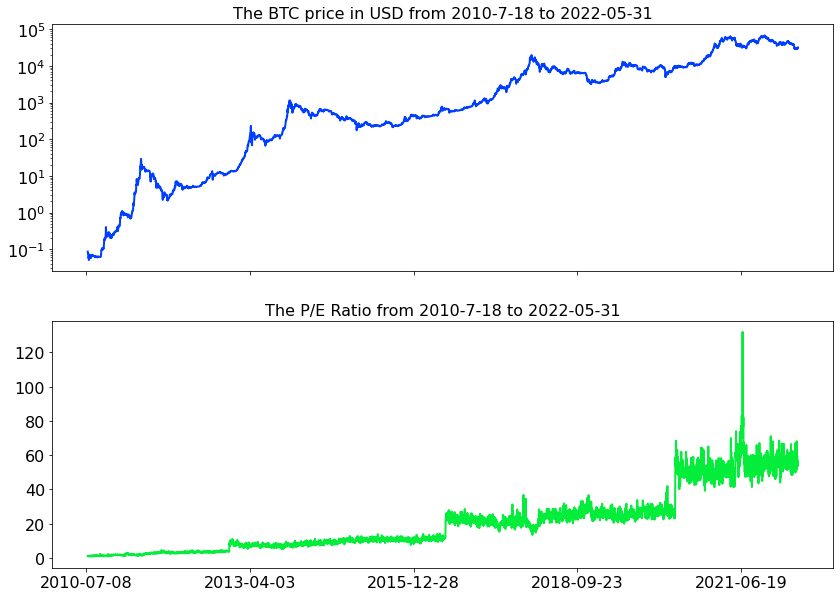

In [ ]:
#####plot the bitcoin price and the PE Ratio
ax = df_btc[['PriceUSD','P/E Ratio']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The P/E Ratio from 2010-7-18 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
plt.savefig('btc_PE_log.png')

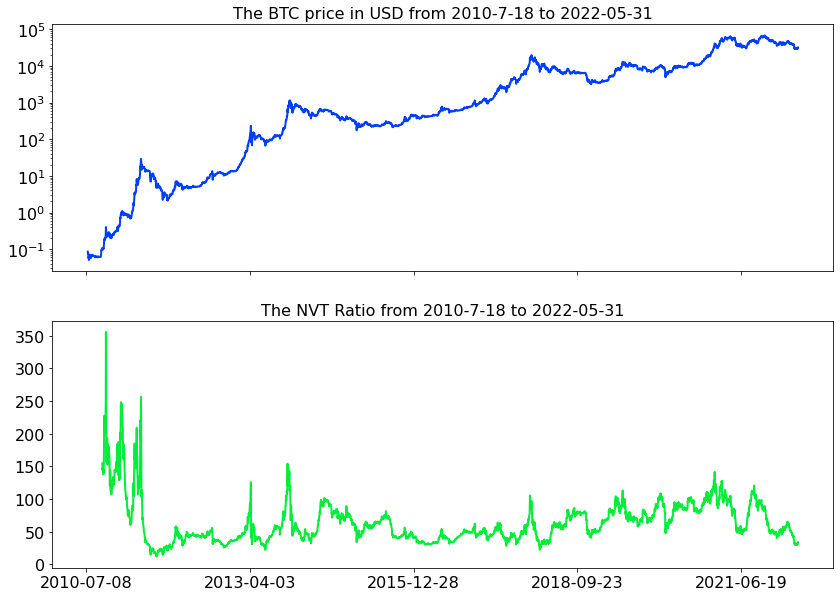

In [ ]:
#####plot the bitcion price and the NVT 90 Adjusted Ration
ax = df_btc[['PriceUSD','NVTAdj90']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The NVT Ratio from 2010-7-18 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
plt.savefig('btc_NVT_log.png')

In [ ]:
df_btc['Metcalfe']=df_btc['AdrActCnt'].pow(2)
df_btc['PM']=df_btc['PriceUSD']/df_btc['Metcalfe']

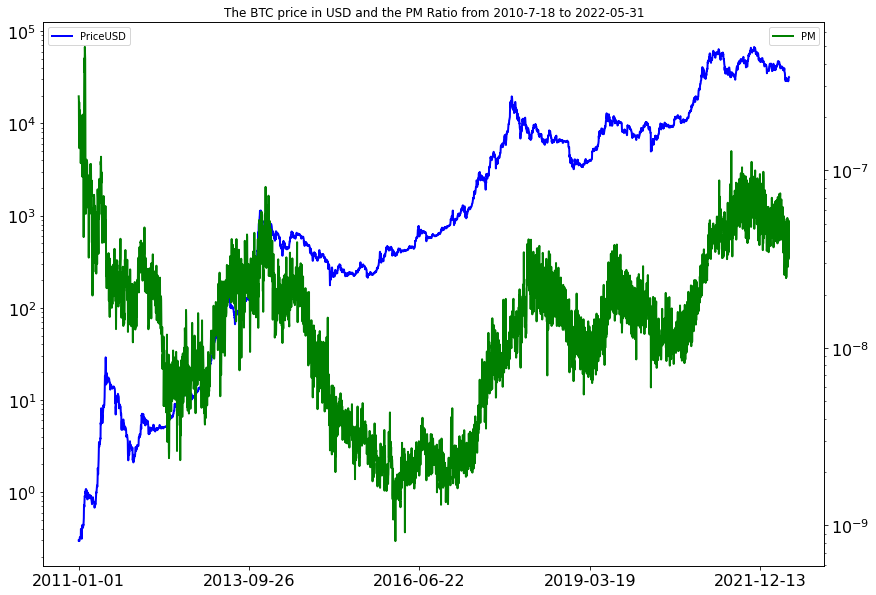

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df_btc['PriceUSD']['2010-7-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df_btc['PM']['2010-7-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The BTC price in USD and the PM Ratio from 2010-7-18 to 2022-05-31')
plt.legend(loc='best')
plt.savefig('btc_PTM.png')

In [ ]:
df_btc.index=pd.to_datetime(df_btc.index)
df_UTXO.index=pd.to_datetime(df_UTXO.index)
df = pd.merge(df_btc, df_UTXO, how='outer', left_index=True, right_index=True)
df.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio
2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
###token utility=100*velocity*staking ratio/(diluation rate*velocity)
df['Token Utility']=100*df['Velocity']*df['One-year staking ratio']/df['Annualized_DilutionRate']

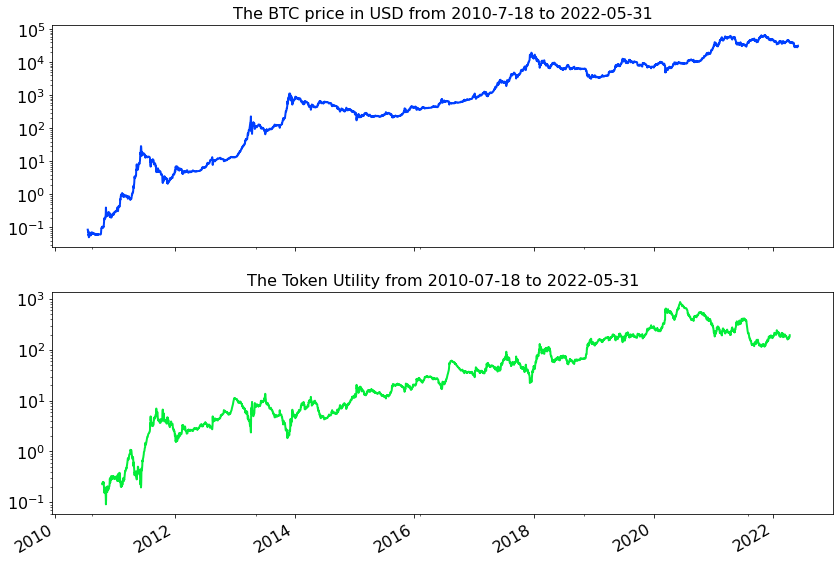

In [ ]:
#####plot the bitcion price and the token utility
ax = df[['PriceUSD','Token Utility']]['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The Token Utility from 2010-07-18 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('btc_TU_log.png')

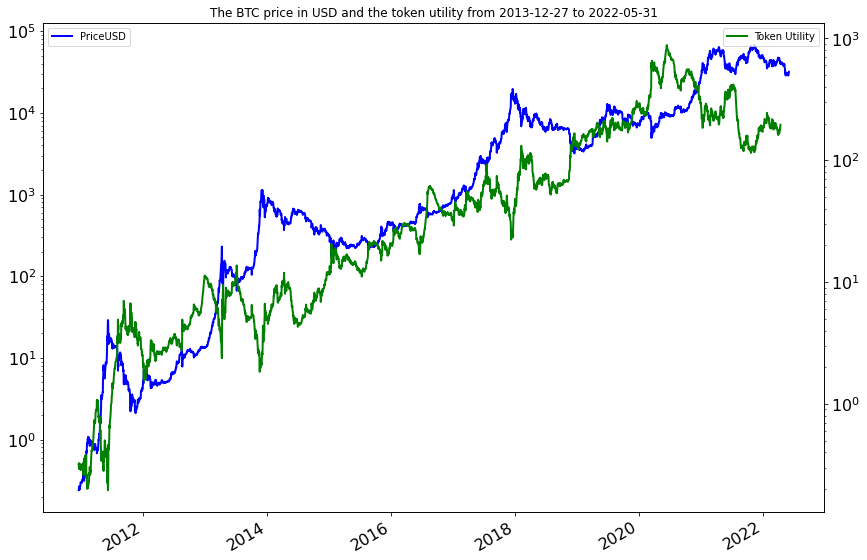

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df['PriceUSD']['2010-12-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['Token Utility']['2010-12-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The BTC price in USD and the token utility from 2013-12-27 to 2022-05-31')
plt.legend(loc='best')
plt.savefig('btc_TU_log_same.png')

In [ ]:
###Calculate PU Ratio
df['PU Ratio']=df['PriceUSD']/df['Token Utility']

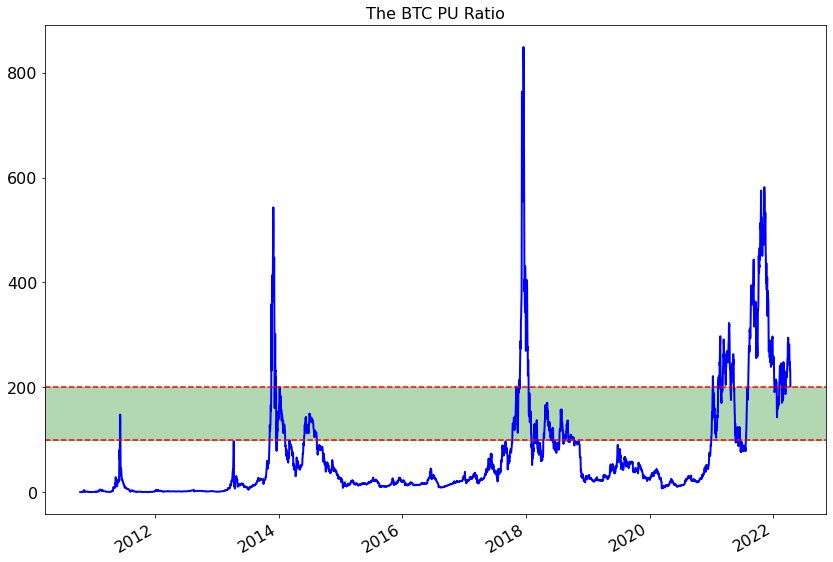

In [ ]:
ax=df['PU Ratio']['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
ax.axhspan(100, 200, color='green', alpha=0.3)
ax.axhline(100, color='red', linestyle='--')
ax.axhline(200, color='red', linestyle='--')
plt.title('The BTC PU Ratio',fontsize=16)
plt.savefig('btc_PU.png')

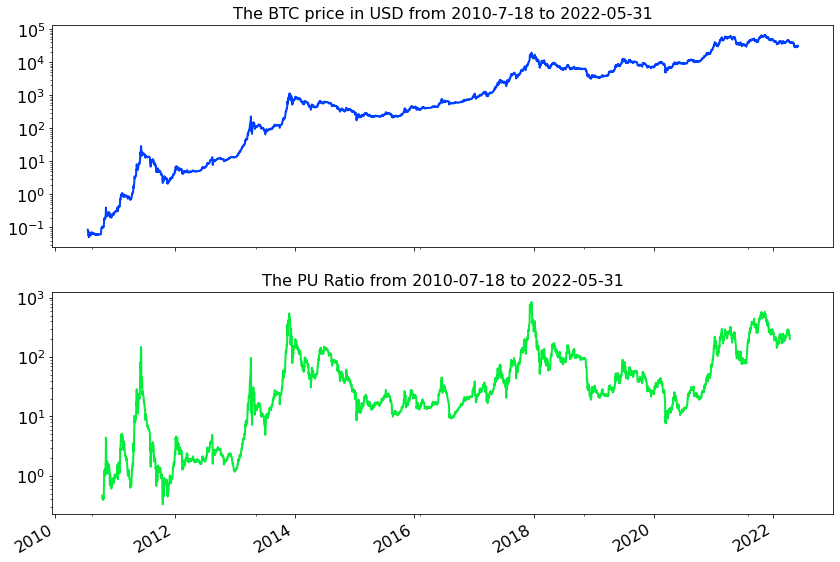

In [ ]:
#####plot the bitcion price and the PU Ratio
ax = df[['PriceUSD','PU Ratio']]['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The PU Ratio from 2010-07-18 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('btc_PU_log.png')

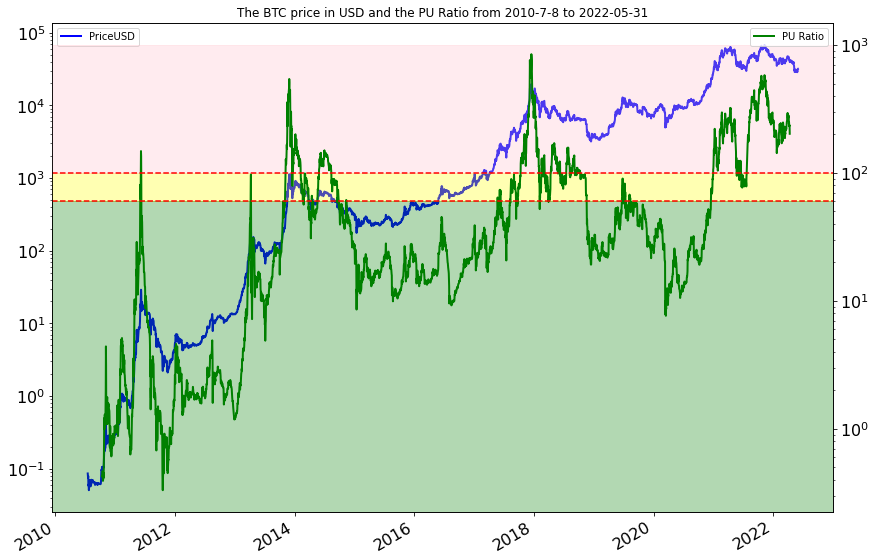

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df['PriceUSD']['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['PU Ratio']['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The BTC price in USD and the PU Ratio from 2010-7-8 to 2022-05-31')
####More about linestyle: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
ax2.axhline(60, color='red', linestyle='--')
ax2.axhline(100, color='red', linestyle='--')
ax2.axhspan(60, 100, color='yellow', alpha=0.3)
ax2.axhspan(100, 1000, color='pink', alpha=0.3)
ax2.axhspan(0, 60, color='green', alpha=0.3)



plt.legend(loc='best')
plt.savefig('btc_PU_log_same_2.png')

In [ ]:
df.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio
2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
# The definition of the volatility
# The 180D volatility, measured as the standard deviation of the natural log of daily returns over the past 180 days.
df['volatility30']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=30).std()
df['volatility60']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=60).std()
df['volatility90']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=90).std()
df['volatility180']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=180).std()

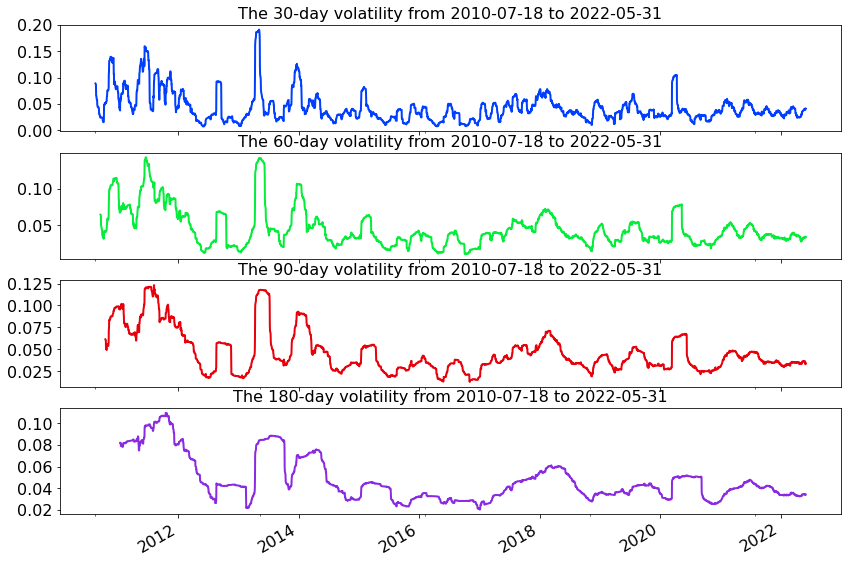

In [ ]:
# plot Volatility using our own calculation
ax = df[['volatility30','volatility60','volatility90','volatility180']]['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(4,1))
ax[0][0].set_title('The 30-day volatility from 2010-07-18 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The 60-day volatility from 2010-07-18 to 2022-05-31',fontsize=16)
ax[2][0].set_title('The 90-day volatility from 2010-07-18 to 2022-05-31',fontsize=16)
ax[3][0].set_title('The 180-day volatility from 2010-07-18 to 2022-05-31',fontsize=16)
plt.savefig('btc_volatility.png')

In [ ]:
# The PU Ration consider 180-day volatility
df['Token Utility_volatility']=df['Token Utility']/df['volatility180']*(df['volatility180'].mean())
df['PU Ratio_volatility']=df['PriceUSD']/df['Token Utility_volatility']

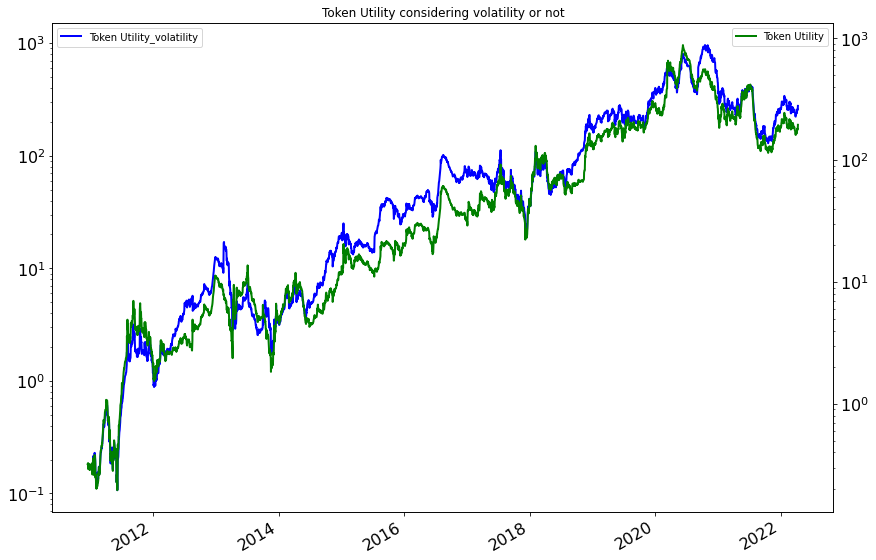

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df['Token Utility_volatility']['2010-12-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['Token Utility']['2010-12-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('Token Utility considering volatility or not')
plt.legend(loc='best')
plt.savefig('btc_TU_V.png')

In [ ]:
df.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.to_csv('BTC_2020_12_31_processed.csv')